## Load Packages

In [1]:
using Dates 

include("jlFiles/printmat.jl")

printlnPs (generic function with 2 methods)

In [2]:
using Plots
backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(480,320))
    default(fmt = :svg)
end

# Portfolio Choice

Suppose you can invest in a risky asset ($R$, with expected return $\mu$ and standard deviation $\sigma$) and into a riskfree asset (at the rate $R_f$). 

With the portfolio weight $v$ on the risky asset, 

$R_p = v R + (1-v)R_f$. 

The average and standard deviation of the portfolio are therefore

$\text{E}R_p = v \mu + (1-v)R_f$ 

and 

$\text{Std}(R_p) = |v|\sigma$

In [3]:
μ  = 9.5/100  #expected return on "market"
σ  = 8/100    #std of market 
Rf = 3/100    #risk free return (interest rate)
v  = 0.5  

ERp   = v*μ + (1 - v)*Rf      
StdRp = abs(v)*σ

println("ERp and Std(Rp) when v=$v: $ERp $StdRp")

ERp and Std(Rp) when v=0.5: 0.0625 0.04


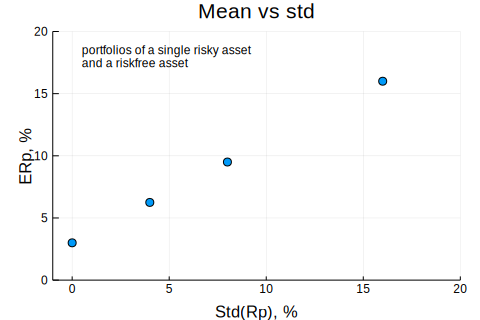

In [4]:
v     = [0;0.5;1;2]          #trying different weights on risky asset 
ERp   = v*μ + (1 .- v)*Rf    #vector since v is
StdRp = abs.(v)*σ 

p1 = scatter(StdRp*100,ERp*100,legend=false,ylim=(0,20),xlim=(-1,20))
title!("Mean vs std")
xlabel!("Std(Rp), %")
ylabel!("ERp, %")
annotate!(0.5,18,text("portfolios of a single risky asset\n and a riskfree asset",8,:left))

Maximizing $\text{E}R_p - k/2\times \text{Var}(R_p)$ by choosing the weight on the risky asset $v$ (and allocating $1-v$ to the risk free asset) gives the optimal portfolio weight

$v = \frac{\mu - R_f}{k\sigma^2}$

In [5]:
k = 25
vopt = (μ-Rf)/(k*σ^2)
printlnPs("Weight on risk and riskfree when k = $k: ",vopt," ",1-vopt)

Weight on risk and riskfree when k = 25:      0.406               0.594


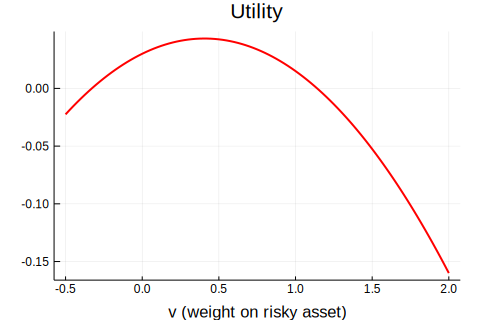

In [6]:
v     = range(-0.5,stop=2,length=101)   #trying different portfolio weights
ERp   = v*μ + (1 .- v)*Rf
VarRp = v.^2*σ^2 
Util  = ERp - k/2*VarRp

p1 = plot(v,Util,color=:red,linewidth=2,legend=false)
title!("Utility")
xlabel!("v (weight on risky asset)")

#    Diversification

The variance of an equally weighted portfolio is

$\sigma^2_p = (\sigma_{ii} - \sigma_{ij})/n + \sigma_{ij}$,

where $\sigma_{ii}$ is the average variance (across the assets) and $\sigma_{ij}$ is the average covariance across the assets.

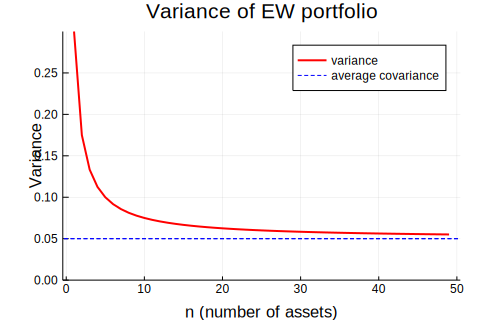

In [7]:
σii = 0.3      #average variance
σij = 0.05     #average covariance
n    = 1:49    #try all these values of n

VarRp = (σii-σij)./n .+ σij     #variance of equally weighted portfolio

p1 = plot(n,VarRp,color=:red,linewidth=2,ylim=(0,0.3),label="variance")
plot!([σij;σij],linetype=:hline,line=(:dash,1),color=:blue,label="average covariance")
title!("Variance of EW portfolio")
xlabel!("n (number of assets)")
ylabel!("Variance")